<a href="https://colab.research.google.com/github/jpedrocf/MachineLearningMVP/blob/main/PremierLeagueMVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Dataset

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from warnings import filterwarnings
filterwarnings('ignore')

In [247]:
url_scorestable = 'https://raw.githubusercontent.com/jpedrocf/MachineLearningMVP/refs/heads/main/players-23-24-score.csv'
url_playerstable ='https://raw.githubusercontent.com/jpedrocf/MachineLearningMVP/refs/heads/main/premier-player-23-24.csv'

In [248]:
playerstable = pd.read_csv(url_playerstable, sep=',')
scorestable = pd.read_csv(url_scorestable, sep=',')

In [249]:
playerstable.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [250]:
scorestable.head()

,Team,Player,SofascoreScore
0,Manchester City,Rodri,8.01
1,Burnley,Arijanet Muric,8.00
2,Manchester City,Kevin De Bruyne,7.93
3,Manchester City,Phil Foden,7.79
4,Manchester United,Bruno Fernandes,7.75


## Data Cleaning and Management

### Merge Score

In [251]:
players_df_merged = playerstable.merge(scorestable[["Player", "SofascoreScore"]], on='Player', how = 'left')
players_df_merged.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,SofascoreScore
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City,8.01
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,7.79
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City,7.00
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,7.36
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City,7.15


In [252]:
players_df_merged.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90',
       'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90',
       'npxG+xAG_90', 'Team', 'SofascoreScore'],
      dtype='object')

### Column Selection

In [253]:
players_df = players_df_merged[['Player', 'Nation', 'Team', 'Pos', 'Age', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR', 'xG', 'xAG', 'SofascoreScore']]

In [254]:
players_df['Gls+Ast'] = players_df['Gls'] + players_df['Ast']
players_df['xAst+xG'] = players_df['xAG'] + players_df['xG']

In [255]:
players_df.head()

,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,CrdY,CrdR,PrgC,PrgP,PrgR,xG,xAG,SofascoreScore,Gls+Ast,xAst+xG
0,Rodri,es ESP,Manchester City,MF,27.0,34,2931.0,32.6,8.0,9.0,8.0,1.0,76.0,376.0,55.0,4.1,3.9,8.01,17.0,8.0
1,Phil Foden,eng ENG,Manchester City,"FW,MF",23.0,33,2857.0,31.7,19.0,8.0,2.0,0.0,93.0,168.0,269.0,10.3,8.4,7.79,27.0,18.7
2,Ederson,br BRA,Manchester City,GK,29.0,33,2785.0,30.9,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.1,7.00,0.0,0.1
3,Julián Álvarez,ar ARG,Manchester City,"MF,FW",23.0,31,2647.0,29.4,11.0,8.0,2.0,0.0,64.0,103.0,180.0,13.0,6.4,7.36,19.0,19.4
4,Kyle Walker,eng ENG,Manchester City,DF,33.0,30,2767.0,30.7,0.0,4.0,2.0,0.0,74.0,157.0,172.0,0.4,2.6,7.15,4.0,3.0


In [256]:
players_df = players_df[~players_df['Pos'].isin(['GK', 'DF', 'DF,FW', 'DF,MF', 'FW,DF', 'MF,DF'])]
players_df['Pos'] = players_df['Pos'].replace({'MF,FW': 'MF', 'FW,MF': 'FW'})
players_df['Pos'].value_counts()

,count
Pos,
MF,162
FW,154


I removed the defensive positions because the features in our dataset are offensive features, i also aggrouped in 2 classes MF and FW.

### Transforming Nation in a 3 Letters Column

In [257]:
players_df['Nation'] = players_df['Nation'].str[-3:]

In [258]:
players_df['Nation'].value_counts()

,count
Nation,
ENG,106
BRA,20
FRA,14
POR,12
SCO,11
BEL,11
ESP,10
DEN,9
ARG,8


### Adjustment of Duplicates

In [259]:
duplicate_players = players_df[players_df.duplicated(subset=['Player'], keep=False)]
print(f"Number of duplicate players: {len(duplicate_players)}")
duplicate_players.sort_values(by='Player')

Number of duplicate players: 18


,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,CrdY,CrdR,PrgC,PrgP,PrgR,xG,xAG,SofascoreScore,Gls+Ast,xAst+xG
293,Alex Iwobi,NGA,Fulham,FW,27.0,25,2192.0,24.4,5.0,2.0,2.0,0.0,109.0,147.0,175.0,5.3,4.7,7.06,7.0,10.0
331,Alex Iwobi,NGA,Everton,MF,27.0,2,140.0,1.6,0.0,0.0,0.0,0.0,6.0,4.0,8.0,0.3,0.2,7.06,0.0,0.5
98,Armando Broja,ALB,Chelsea,FW,21.0,6,454.0,5.0,1.0,0.0,0.0,0.0,11.0,6.0,37.0,2.4,0.2,6.61,1.0,2.6
308,Armando Broja,ALB,Fulham,FW,21.0,0,88.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,7.0,0.0,0.4,6.61,1.0,0.4
480,Brennan Johnson,WAL,Nottingham Forest,FW,22.0,3,237.0,2.6,0.0,0.0,0.0,0.0,8.0,1.0,14.0,0.3,0.2,6.94,0.0,0.5
154,Brennan Johnson,WAL,Tottenham Hotspur,FW,22.0,23,2085.0,23.2,5.0,10.0,3.0,0.0,97.0,72.0,293.0,10.3,8.1,6.94,15.0,18.4
231,Cameron Archer,ENG,Aston Villa,MF,22.0,0,6.0,0.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6.72,0.0,0.0
552,Cameron Archer,ENG,Sheffield United,FW,22.0,21,1832.0,20.4,4.0,1.0,1.0,0.0,33.0,15.0,113.0,5.5,2.8,6.72,5.0,8.3
23,Cole Palmer,ENG,Manchester City,MF,21.0,0,11.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.70,0.0,0.0
83,Cole Palmer,ENG,Chelsea,FW,21.0,29,2607.0,29.0,22.0,11.0,7.0,0.0,117.0,197.0,195.0,18.2,11.1,7.70,33.0,29.3


The players we saw above changed clubs during the 23/24 season, and the player's rating reflects the entire season. I kept the duplicated rows but summed the features to get a true understanding of these players' performance throughout the season.

In [260]:
# Group by player and sum the specified columns

sum_columns = ['Starts', 'Min', '90s', 'Gls', 'Ast', 'CrdY', 'CrdR', 'xG', 'xAG', 'xAst+xG', 'Gls+Ast', 'PrgC', 'PrgP', 'PrgR']
players_df_summed = players_df.copy()
players_df_summed[sum_columns] = players_df.groupby('Player')[sum_columns].transform('sum')

players_df = players_df_summed

In [261]:
players_df['PrgCPer90'] = players_df['PrgC'] / players_df['90s']
players_df['PrgPPer90'] = players_df['PrgP'] / players_df['90s']
players_df['PrgRPer90'] = players_df['PrgR'] / players_df['90s']

In [262]:
def calculate_effectiveness(row):
    if row['Gls+Ast'] == 0 and row['xAst+xG'] == 0:
        return 1
    elif row['xAst+xG'] == 0:
        return 0
    else:
        return row['Gls+Ast'] / row['xAst+xG']

I created this function to handle cases where both expected goals + assists (xAst + xG) and goals + assists (Gls + Ast) are equal to 0. Without this function, the Effectiveness value would be set to 0, potentially causing inconsistencies or misrepresentations in the data. By implementing this condition, when both values are 0, Effectiveness is set to 1, ensuring more accurate and consistent results in such edge cases.

In [263]:
players_df['Effectiveness'] = players_df.apply(calculate_effectiveness, axis=1)

cols = list(players_df.columns)
cols.remove('SofascoreScore')
cols.append('SofascoreScore')
players_df = players_df[cols]

In [264]:
test_group_duplicates = players_df_summed[players_df_summed['Player'].str.contains('Matheus Nunes', case=False, na=False)]

print(test_group_duplicates)

            Player Nation             Team Pos   Age  Starts    Min  90s  Gls  \
17   Matheus Nunes    POR  Manchester City  MF  24.0       9  840.0  9.3  0.0   
418  Matheus Nunes    POR    Wolverhampton  MF  24.0       9  840.0  9.3  0.0   

     Ast  ...  PrgR   xG  xAG  SofascoreScore  Gls+Ast  xAst+xG  PrgCPer90  \
17   2.0  ...  67.0  0.9  1.2             6.8      2.0      2.1   3.763441   
418  2.0  ...  67.0  0.9  1.2             6.8      2.0      2.1   3.763441   

     PrgPPer90  PrgRPer90  Effectiveness  
17    4.516129   7.204301       0.952381  
418   4.516129   7.204301       0.952381  

[2 rows x 24 columns]


The output is as I expected. Let's move on.

### Null Removal

In [265]:
players_df['SofascoreScore'].isna().sum()

11

In [266]:
na_players = players_df[players_df['SofascoreScore'].isna()][['Team', 'Player','SofascoreScore']]

print(na_players)

                  Team            Player  SofascoreScore
54           Liverpool      Kaide Gordon             NaN
110            Chelsea        Alex Matos             NaN
111            Chelsea   Jimi Tauriainen             NaN
143   Newcastle United   Michael Ndiweni             NaN
172  Tottenham Hotspur      Jamie Donley             NaN
195  Manchester United       Amad Diallo             NaN
203  Manchester United       Daniel Gore             NaN
335            Everton     Thomas Cannon             NaN
336            Everton     Tyler Onyango             NaN
337            Everton  Lewis Warrington             NaN
397        Bournemouth      Dominic Sadi             NaN


In [267]:
players_df = players_df.dropna(subset=['SofascoreScore'])

In [268]:
# Null Checking

players_df.isna().sum()

,0
Player,0
Nation,0
Team,0
Pos,0
Age,0
Starts,0
Min,0
90s,0
Gls,0
Ast,0


In [269]:
players_df[players_df['PrgPPer90'].isna()]

,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,...,PrgR,xG,xAG,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore
142,Amadou Diallo,ENG,Newcastle United,MF,20.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,6.94
233,Finley Munroe,ENG,Aston Villa,MF,18.0,0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,6.50
234,Jaden Philogene Bidace,ENG,Aston Villa,FW,21.0,0,4.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,inf,NaN,inf,1.0,6.40


In [270]:
players_df  = players_df.dropna(subset=['PrgPPer90'])
players_df  = players_df.dropna(subset=['PrgCPer90'])
players_df  = players_df.dropna(subset=['PrgRPer90'])

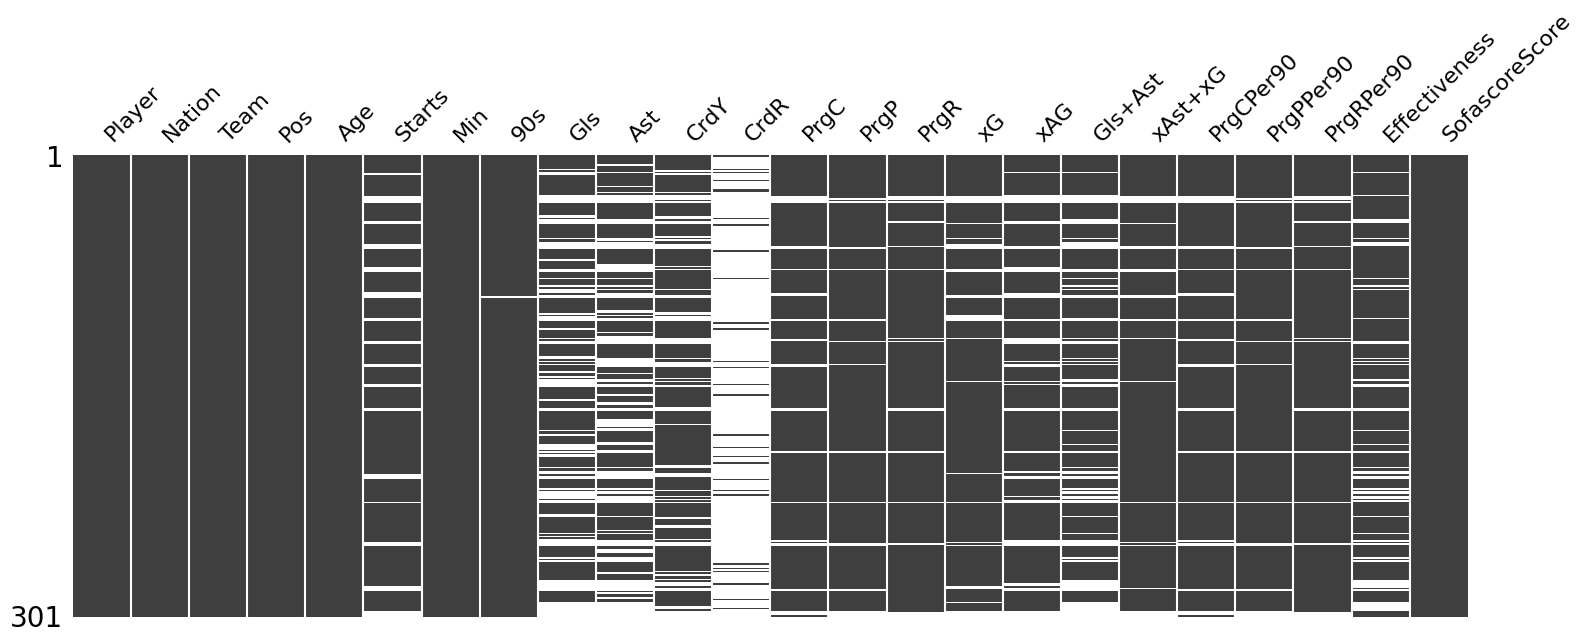

In [271]:
# Missingno

col = list(players_df.columns)

msngno = players_df[col[:]]

msngno.replace(0, np.nan, inplace=True)

fig, ax = plt.subplots(figsize=(18, 6))

ms.matrix(msngno, ax=ax)

plt.show()

Creating a dataframe (msngno) to visualize the amount of 0's in the dataset

In [272]:
# Filter the DataFrame to include only rows where the '90s' column is equal to 0.

cases_90s_0 = players_df[players_df['90s'] == 0]

cases_90s_0

,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,...,PrgR,xG,xAG,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore
171,Mikey Moore,ENG,Tottenham Hotspur,MF,15.0,0,4.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,inf,inf,inf,1.0,6.4


In [273]:
# Remove rows where '90s' is equal to 0

players_df = players_df[players_df['90s'] != 0]

players_df[players_df['90s'] == 0]

,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,...,PrgR,xG,xAG,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore


As we can observe in the dataframe cases_90s_0, 6 players have such low playing time that all their columns are zero. This could affect the sample, so they were removed.

In [274]:
# Null Checking

players_df.isna().sum()

,0
Player,0
Nation,0
Team,0
Pos,0
Age,0
Starts,0
Min,0
90s,0
Gls,0
Ast,0


## Data Analysis

In [275]:
players_df.describe()

,Age,Starts,Min,90s,Gls,Ast,CrdY,CrdR,PrgC,PrgP,PrgR,xG,xAG,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,24.210000,14.410000,1292.666667,14.361000,3.516667,2.196667,3.083333,0.103333,34.493333,57.493333,75.373333,3.498667,2.221667,5.713333,5.720333,2.551502,3.831701,5.549864,0.896768,6.875800
std,4.136375,11.741441,986.569270,10.960841,4.666438,2.837515,3.071564,0.326103,37.569333,61.867833,81.778520,4.357801,2.567776,6.815619,6.353438,2.547206,2.879118,4.185844,0.672868,0.306843
min,16.000000,0.000000,5.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000
25%,21.000000,2.000000,331.750000,3.675000,0.000000,0.000000,1.000000,0.000000,7.000000,9.000000,14.000000,0.400000,0.300000,1.000000,0.900000,1.027621,2.169020,2.263459,0.569416,6.677500
50%,24.000000,14.000000,1221.500000,13.600000,2.000000,1.000000,2.000000,0.000000,21.000000,39.500000,44.000000,1.900000,1.350000,3.000000,3.300000,1.873526,3.390100,5.243694,0.946657,6.850000
75%,27.000000,25.000000,2099.500000,23.325000,5.000000,3.000000,5.000000,0.000000,53.250000,79.250000,117.000000,5.125000,3.200000,9.000000,8.525000,3.474057,4.881391,7.260234,1.176471,7.042500
max,35.000000,37.000000,3325.000000,36.900000,27.000000,13.000000,13.000000,2.000000,218.000000,376.000000,508.000000,29.200000,11.800000,33.000000,33.500000,20.000000,30.000000,30.000000,5.000000,8.010000


### Scatter Plot

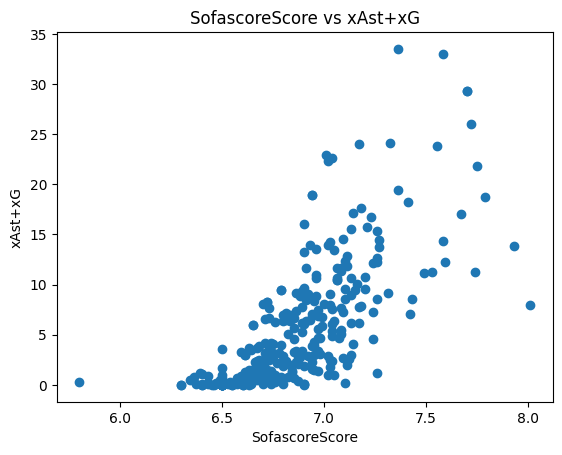

In [276]:
plt.scatter(players_df['SofascoreScore'], players_df['xAst+xG'])
plt.xlabel('SofascoreScore')
plt.ylabel('xAst+xG')
plt.title('SofascoreScore vs xAst+xG')
plt.show()

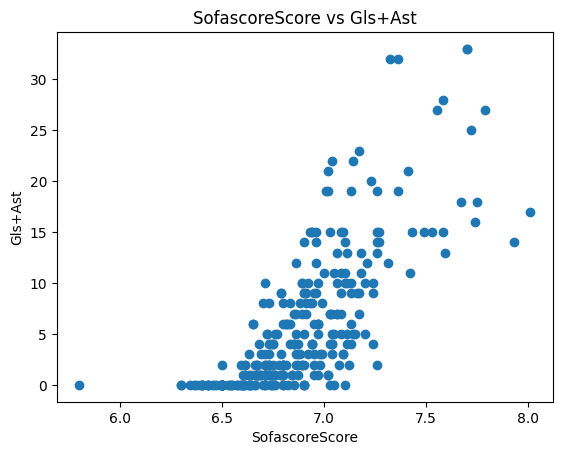

In [277]:
plt.scatter(players_df['SofascoreScore'], players_df['Gls+Ast'])
plt.xlabel('SofascoreScore')
plt.ylabel('Gls+Ast')
plt.title('SofascoreScore vs Gls+Ast')
plt.show()

In [278]:
# Outliers

outliers_xAG = players_df[(players_df['SofascoreScore'] < 6) & (players_df['xAst+xG'] < 1)]

outliers_xAG

,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,...,PrgR,xG,xAG,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore
309,Luke Harris,WAL,Fulham,MF,18.0,0,75.0,0.8,0.0,0.0,...,0.0,0.3,0.0,0.0,0.3,0.0,1.25,0.0,0.0,5.8


In [279]:
outliers_glsast = players_df[(players_df['SofascoreScore'] < 6) & (players_df['Gls+Ast'] < 1)]

outliers_glsast

,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,...,PrgR,xG,xAG,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore
309,Luke Harris,WAL,Fulham,MF,18.0,0,75.0,0.8,0.0,0.0,...,0.0,0.3,0.0,0.0,0.3,0.0,1.25,0.0,0.0,5.8


The decision to keep the outlier is based on its limited impact on the model, as there is only one instance, which minimizes its influence on the overall learning process. Additionally, maintaining the outlier can enhance the model's ability to generalize, ensuring it is prepared to handle similar rare cases in future scenarios.

### Heatmap

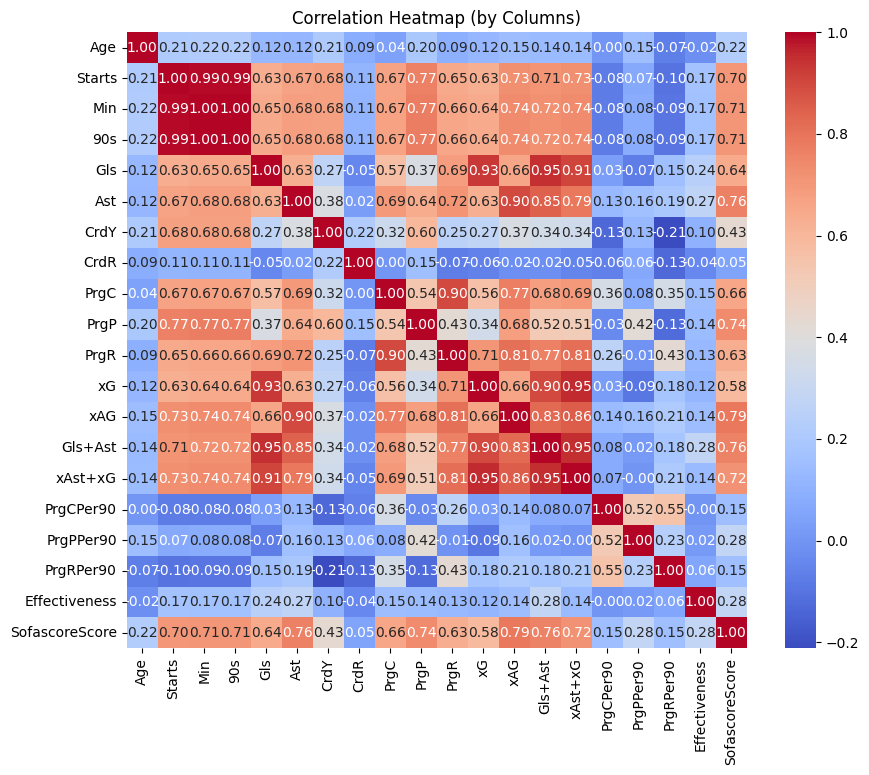

In [280]:
players_heatmap = players_df.drop(columns=['Player', 'Nation', 'Team'])

numeric_columns = players_heatmap.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (by Columns)')
plt.show()

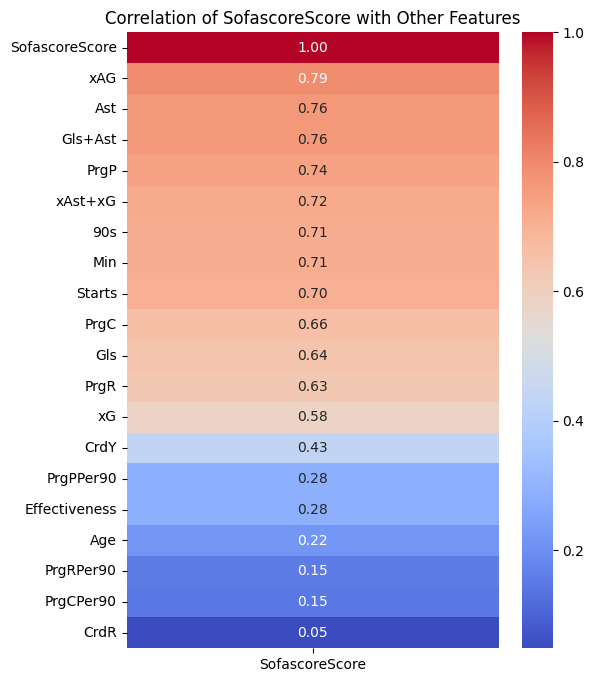

In [281]:
# Ordering the top correlations with SofascoreScore
sofascore_corr = correlation_matrix['SofascoreScore'].sort_values(ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(sofascore_corr.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of SofascoreScore with Other Features')
plt.show()

The correlation heatmap reveals that SofascoreScore has a strong positive correlation with xAG, Ast, Gls+Ast, PrgP, xAst+xG, 90s, Min and Starts. Additionally, PrgC, Gls, PrgR and xG show moderate correlations. Weak correlations are observed with CrdY Effectiveness and Age. CrdR has almost no correlation. These insights suggest that offensive contributions and playing time are the strongest predictors of SofascoreScore

In [282]:
mf_players = players_df[players_df['Pos'].isin(['MF'])]
fw_players = players_df[players_df['Pos'].isin(['FW'])]

# Sort by SofascoreScore in descending order - MF

mf_players_sorted = mf_players.sort_values('SofascoreScore', ascending=False)

# Select relevant columns for the heatmap - MF

players_heatmap_mf = mf_players_sorted.drop(columns=['Player', 'Nation', 'Team', 'Pos'])

numeric_columns_mf = players_heatmap_mf.select_dtypes(include=['number'])

correlation_matrix_mf = numeric_columns_mf.corr()
sofascore_corr_mf = correlation_matrix_mf['SofascoreScore'].sort_values(ascending=False)


# Sort by SofascoreScore in descending order- FW

fw_players_sorted = fw_players.sort_values('SofascoreScore', ascending=False)

# Select relevant columns for the heatmap - FW

players_heatmap_fw = fw_players_sorted.drop(columns=['Player', 'Nation', 'Team', 'Pos'])

numeric_columns_fw = players_heatmap_fw.select_dtypes(include=['number'])

correlation_matrix_fw = numeric_columns_fw.corr()
sofascore_corr_fw = correlation_matrix_fw['SofascoreScore'].sort_values(ascending=False)

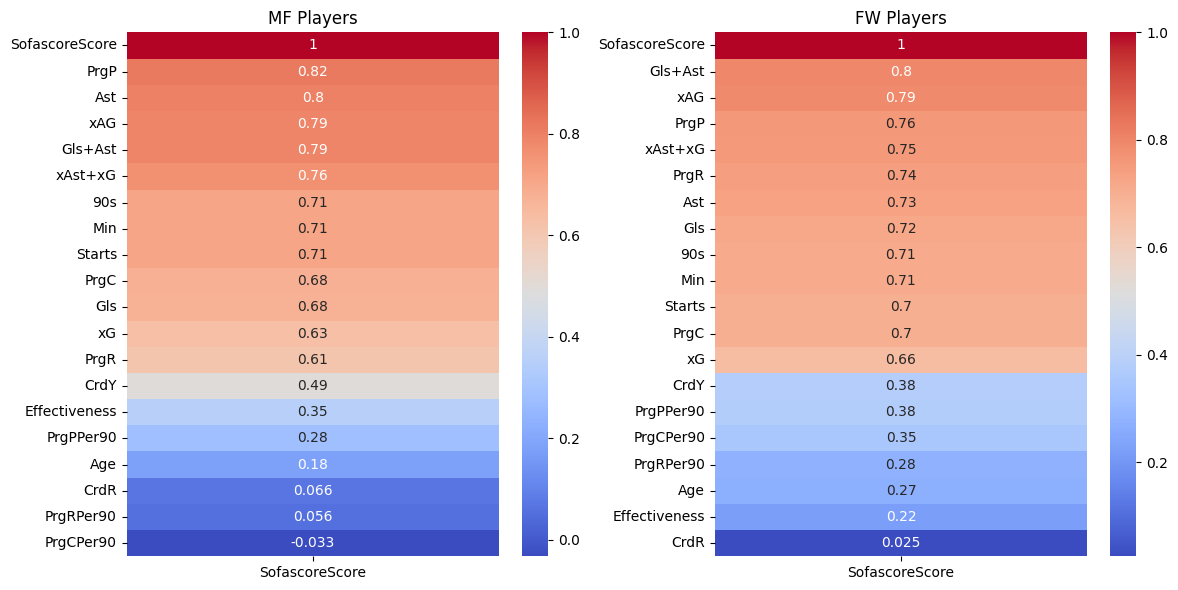

In [283]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Heatmap para MF Players
sns.heatmap(sofascore_corr_mf.to_frame(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('MF Players')

# Heatmap para FW Players
sns.heatmap(sofascore_corr_fw.to_frame(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('FW Players')

plt.tight_layout()
plt.show()

The correlations shown in the heatmaps separated by MF and FW indicate that the features have different weights for each group. This suggests that the importance of certain features may vary depending on the player's position.

This difference in feature weights emphasizes the need to apply one-hot encoding to the 'Pos' column. By doing so, you can separate the data into distinct categories for MF and FW players, ensuring that the machine learning model can account for these differences in position-specific feature importance during the learning process.

## Creating the Target (Top, Mid, Low Tier)

In [284]:
players_df2 = players_df.copy()

In [285]:
players_df2['SofascoreScore'].describe()

,SofascoreScore
count,300.000000
mean,6.875800
std,0.306843
min,5.800000
25%,6.677500
50%,6.850000
75%,7.042500
max,8.010000


### Quartile

In [286]:
q1 = players_df2['SofascoreScore'].quantile(0.25)
q3 = players_df2['SofascoreScore'].quantile(0.75)

def categorize_quartiles(score):
    if score > q3:
        return 'Top Tier'
    elif score > q1:
        return 'Mid Tier'
    else:
        return 'Low Tier'

players_df2['Category Quartile'] = players_df2['SofascoreScore'].apply(categorize_quartiles)

players_df2['Category Quartile'].value_counts()

,count
Category Quartile,
Mid Tier,150
Top Tier,75
Low Tier,75


### Clustering

In [287]:
scores = players_df2['SofascoreScore'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=81).fit(scores)

players_df2['Category Cluster'] = kmeans.labels_

category_map = {0: 'Low Tier', 1: 'Mid Tier', 2: 'Top Tier'}
players_df2['Category Cluster'] = players_df2['Category Cluster'].map(category_map)

players_df2['Category Cluster'].value_counts()

,count
Category Cluster,
Low Tier,142
Mid Tier,136
Top Tier,22


### Absolute

In [288]:
players_df2['SofascoreScore'].describe()

,SofascoreScore
count,300.000000
mean,6.875800
std,0.306843
min,5.800000
25%,6.677500
50%,6.850000
75%,7.042500
max,8.010000


In [289]:
def categorize_absolute(score):
    if score >= 7.05:
        return 'Top Tier'
    elif score >= 6.75:
        return 'Mid Tier'
    else:
        return 'Low Tier'

players_df2['Category Absolute'] = players_df2['SofascoreScore'].apply(categorize_absolute)

players_df2['Category Absolute'].value_counts()

,count
Category Absolute,
Mid Tier,115
Low Tier,110
Top Tier,75


In [290]:
players_df2.head(10)

,Player,Nation,Team,Pos,Age,Starts,Min,90s,Gls,Ast,...,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore,Category Quartile,Category Cluster,Category Absolute
0,Rodri,ESP,Manchester City,MF,27.0,34,2931.0,32.6,8.0,9.0,...,17.0,8.0,2.331288,11.533742,1.687117,2.125000,8.01,Top Tier,Top Tier,Top Tier
1,Phil Foden,ENG,Manchester City,FW,23.0,33,2857.0,31.7,19.0,8.0,...,27.0,18.7,2.933754,5.299685,8.485804,1.443850,7.79,Top Tier,Top Tier,Top Tier
3,Julián Álvarez,ARG,Manchester City,MF,23.0,31,2647.0,29.4,11.0,8.0,...,19.0,19.4,2.176871,3.503401,6.122449,0.979381,7.36,Top Tier,Top Tier,Top Tier
5,Bernardo Silva,POR,Manchester City,MF,28.0,29,2578.0,28.6,6.0,9.0,...,15.0,11.3,4.895105,6.188811,9.090909,1.327434,7.53,Top Tier,Top Tier,Top Tier
6,Erling Haaland,NOR,Manchester City,FW,23.0,29,2552.0,28.4,27.0,5.0,...,32.0,33.5,1.232394,0.915493,4.436620,0.955224,7.36,Top Tier,Top Tier,Top Tier
11,Jeremy Doku,BEL,Manchester City,FW,21.0,18,1595.0,17.7,3.0,8.0,...,11.0,7.1,12.316384,3.220339,16.666667,1.549296,7.42,Top Tier,Top Tier,Top Tier
12,Mateo Kovačić,CRO,Manchester City,MF,29.0,16,1551.0,17.2,1.0,0.0,...,1.0,2.9,2.151163,5.813953,2.209302,0.344828,7.02,Mid Tier,Mid Tier,Mid Tier
13,Kevin De Bruyne,BEL,Manchester City,MF,32.0,15,1221.0,13.6,4.0,10.0,...,14.0,13.9,3.455882,8.161765,9.779412,1.007194,7.93,Top Tier,Top Tier,Top Tier
15,Jack Grealish,ENG,Manchester City,FW,27.0,10,1009.0,11.2,3.0,1.0,...,4.0,4.6,7.767857,4.464286,13.035714,0.869565,7.24,Top Tier,Mid Tier,Top Tier
17,Matheus Nunes,POR,Manchester City,MF,24.0,9,840.0,9.3,0.0,2.0,...,2.0,2.1,3.763441,4.516129,7.204301,0.952381,6.80,Mid Tier,Low Tier,Mid Tier


### One Hot Encoder

In [291]:
players_df_final_encoded = pd.get_dummies(players_df2, columns=['Pos'])

print(players_df_final_encoded.head())

           Player Nation             Team   Age  Starts     Min   90s   Gls  \
0           Rodri    ESP  Manchester City  27.0      34  2931.0  32.6   8.0   
1      Phil Foden    ENG  Manchester City  23.0      33  2857.0  31.7  19.0   
3  Julián Álvarez    ARG  Manchester City  23.0      31  2647.0  29.4  11.0   
5  Bernardo Silva    POR  Manchester City  28.0      29  2578.0  28.6   6.0   
6  Erling Haaland    NOR  Manchester City  23.0      29  2552.0  28.4  27.0   

   Ast  CrdY  ...  PrgCPer90  PrgPPer90  PrgRPer90  Effectiveness  \
0  9.0   8.0  ...   2.331288  11.533742   1.687117       2.125000   
1  8.0   2.0  ...   2.933754   5.299685   8.485804       1.443850   
3  8.0   2.0  ...   2.176871   3.503401   6.122449       0.979381   
5  9.0   8.0  ...   4.895105   6.188811   9.090909       1.327434   
6  5.0   1.0  ...   1.232394   0.915493   4.436620       0.955224   

   SofascoreScore  Category Quartile  Category Cluster  Category Absolute  \
0            8.01           Top T

### Target ML Testing

Using ML to help me find the best category divisor method

In [292]:
# Creating the Features Dataframe

features_player = players_df_final_encoded.drop(columns=['Player', 'Nation', 'Team', 'SofascoreScore', 'Category Quartile', 'Category Absolute', 'Category Cluster', 'CrdY', 'CrdR', 'Effectiveness', 'Age', 'xG', 'PrgRPer90', 'PrgPPer90', 'PrgCPer90'])

features_player.head()

,Starts,Min,90s,Gls,Ast,PrgC,PrgP,PrgR,xAG,Gls+Ast,xAst+xG,Pos_FW,Pos_MF
0,34,2931.0,32.6,8.0,9.0,76.0,376.0,55.0,3.9,17.0,8.0,False,True
1,33,2857.0,31.7,19.0,8.0,93.0,168.0,269.0,8.4,27.0,18.7,True,False
3,31,2647.0,29.4,11.0,8.0,64.0,103.0,180.0,6.4,19.0,19.4,False,True
5,29,2578.0,28.6,6.0,9.0,140.0,177.0,260.0,7.6,15.0,11.3,False,True
6,29,2552.0,28.4,27.0,5.0,35.0,26.0,126.0,4.3,32.0,33.5,True,False


In [293]:
# Features and Target

X = features_player
y_cluster = players_df2['Category Cluster']
y_quartile = players_df2['Category Quartile']
y_absolute = players_df2['Category Absolute']

random_state = 28
test_size=0.2

In [294]:
# Cluster Test

X_train, X_test, y_train, y_test = train_test_split(X, y_cluster, test_size=test_size, random_state=random_state)

rf_cluster = RandomForestClassifier(random_state=random_state)
rf_cluster.fit(X_train, y_train)

y_pred = rf_cluster.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Low Tier       0.80      1.00      0.89        20
    Mid Tier       1.00      0.87      0.93        38
    Top Tier       1.00      1.00      1.00         2

    accuracy                           0.92        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.93      0.92      0.92        60



In [295]:
# Quartile Test

X_train, X_test, y_train, y_test = train_test_split(X, y_quartile, test_size=test_size, random_state=random_state)

rf_quartile = RandomForestClassifier(random_state=random_state)
rf_quartile.fit(X_train, y_train)

y_pred = rf_quartile.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Low Tier       0.67      0.91      0.77        11
    Mid Tier       0.85      0.59      0.70        37
    Top Tier       0.47      0.75      0.58        12

    accuracy                           0.68        60
   macro avg       0.66      0.75      0.68        60
weighted avg       0.74      0.68      0.69        60



In [296]:
# Absolute Test

X_train, X_test, y_train, y_test = train_test_split(X, y_absolute, test_size=test_size, random_state=random_state)

rf_absolute = RandomForestClassifier(random_state=random_state)
rf_absolute.fit(X_train, y_train)

y_pred = rf_absolute.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Low Tier       0.67      0.88      0.76        16
    Mid Tier       0.76      0.50      0.60        32
    Top Tier       0.50      0.75      0.60        12

    accuracy                           0.65        60
   macro avg       0.64      0.71      0.65        60
weighted avg       0.68      0.65      0.64        60



I have chosen clustering as the method to define the target categories for my model due to its higher overall performance metrics, with better precision, recall, and F1-scores across all categories. Additionally, clustering adapts well to the subtle differences in SofascoreScore, which are very close together in this dataset, providing a more meaningful division of players.

In [297]:
players_df_final = players_df_final_encoded.drop(columns=['Category Quartile', 'Category Absolute'])

In [298]:
players_df_final.head()

,Player,Nation,Team,Age,Starts,Min,90s,Gls,Ast,CrdY,...,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,SofascoreScore,Category Cluster,Pos_FW,Pos_MF
0,Rodri,ESP,Manchester City,27.0,34,2931.0,32.6,8.0,9.0,8.0,...,17.0,8.0,2.331288,11.533742,1.687117,2.125000,8.01,Top Tier,False,True
1,Phil Foden,ENG,Manchester City,23.0,33,2857.0,31.7,19.0,8.0,2.0,...,27.0,18.7,2.933754,5.299685,8.485804,1.443850,7.79,Top Tier,True,False
3,Julián Álvarez,ARG,Manchester City,23.0,31,2647.0,29.4,11.0,8.0,2.0,...,19.0,19.4,2.176871,3.503401,6.122449,0.979381,7.36,Top Tier,False,True
5,Bernardo Silva,POR,Manchester City,28.0,29,2578.0,28.6,6.0,9.0,8.0,...,15.0,11.3,4.895105,6.188811,9.090909,1.327434,7.53,Top Tier,False,True
6,Erling Haaland,NOR,Manchester City,23.0,29,2552.0,28.4,27.0,5.0,1.0,...,32.0,33.5,1.232394,0.915493,4.436620,0.955224,7.36,Top Tier,True,False


In [299]:
# Reorganizing Columns
cols = [col for col in players_df_final.columns if col not in ['SofascoreScore', 'Category Cluster']]
cols += ['SofascoreScore', 'Category Cluster']
players_df_final = players_df_final[cols]

players_df_final.head()

,Player,Nation,Team,Age,Starts,Min,90s,Gls,Ast,CrdY,...,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Effectiveness,Pos_FW,Pos_MF,SofascoreScore,Category Cluster
0,Rodri,ESP,Manchester City,27.0,34,2931.0,32.6,8.0,9.0,8.0,...,17.0,8.0,2.331288,11.533742,1.687117,2.125000,False,True,8.01,Top Tier
1,Phil Foden,ENG,Manchester City,23.0,33,2857.0,31.7,19.0,8.0,2.0,...,27.0,18.7,2.933754,5.299685,8.485804,1.443850,True,False,7.79,Top Tier
3,Julián Álvarez,ARG,Manchester City,23.0,31,2647.0,29.4,11.0,8.0,2.0,...,19.0,19.4,2.176871,3.503401,6.122449,0.979381,False,True,7.36,Top Tier
5,Bernardo Silva,POR,Manchester City,28.0,29,2578.0,28.6,6.0,9.0,8.0,...,15.0,11.3,4.895105,6.188811,9.090909,1.327434,False,True,7.53,Top Tier
6,Erling Haaland,NOR,Manchester City,23.0,29,2552.0,28.4,27.0,5.0,1.0,...,32.0,33.5,1.232394,0.915493,4.436620,0.955224,True,False,7.36,Top Tier


# Model Testing

In [300]:
X = features_player
y = players_df_final['Category Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=28)

scoring = 'f1_macro'
kfold = KFold(n_splits=10, shuffle=True, random_state=28)

I chose f1_macro as the scoring metric for hyperparameter tuning because it provides a balanced evaluation of the model's performance across all classes, including both majority and minority ones. Since my dataset has some degree of class imbalance, particularly with the Top Tier category having fewer samples, f1_macro ensures that the model's precision and recall are equally prioritized for each class. This makes it a suitable metric for capturing the overall performance without biasing towards the majority class.

## Hyperparameters Testing and Tuning - Cross Validation

In [301]:
# Testing best n_estimators and max_depth for RandomForestClassifier

modeltest = RandomForestClassifier(random_state=random_state)
param_grid = {'n_estimators': [100, 200, 300, 400, 500, 1000],
              'max_depth': [10, 20, 30, None]}

grid_search = GridSearchCV(estimator=modeltest, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 20, 'n_estimators': 200}
Best score:  0.7635918092241915


In [302]:
# Testing best hyperparameters for KNeighborsClassifier

modeltest2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
              }

grid_search = GridSearchCV(estimator=modeltest2, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best score:  0.6481976611527436


In [303]:
# Testing best hyperparameters for LogisticRegression

modeltest3 = LogisticRegression()
param_grid = {'max_iter': [100, 200, 300, 400, 500],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l1', 'l2', 'elasticnet', None],
              'class_weight': [None, 'balanced'],
              }
grid_search = GridSearchCV(estimator=modeltest3, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.7704883856697917


In [304]:
# Testing best hyperparameters for DecisionTreeClassifier

modeltest4 = DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [2, 5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2', None]
              }

grid_search = GridSearchCV(estimator=modeltest4, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score:  0.7451269444922696


In [305]:
# Testing best hyperparameters for Naive Bayes

modeltest5 = GaussianNB()
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
              }

grid_search = GridSearchCV(estimator=modeltest5, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'var_smoothing': 1e-05}
Best score:  0.6979358732070023


In [306]:
# Testing best hyperparameters for SVM (WARNING: LONG PROCESSING TIME)

modeltest6 = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 0.1],
    'degree': [3],
    'coef0': [0.0]
}


grid_search = GridSearchCV(estimator=modeltest6, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'C': 0.1, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best score:  0.7533353479900795


In [307]:
# Testing best hyperparameters for Gradient Boosting (WARNING: LONG PROCESSING TIME)

modeltest7 = GradientBoostingClassifier()
param_grid = {'n_estimators': [50, 300, 400],
              'max_depth': [1, 10],
              'min_samples_split': [8, 10, 40],
              'min_samples_leaf': [2, 4],
}

grid_search = GridSearchCV(estimator=modeltest7, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best score:  0.7381282313803516


In [308]:
# Testing best hyperparameters for Ada Boost

modeltest8 = AdaBoostClassifier()
param_grid = {'n_estimators': [50, 100, 200, 400, 1000, 2000],
              'learning_rate': [0.01, 0.1, 0.5, 1, 1.5],
              'estimator': [None, DecisionTreeClassifier(), KNeighborsClassifier()]
}

grid_search = GridSearchCV(estimator=modeltest8, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'estimator': None, 'learning_rate': 1.5, 'n_estimators': 50}
Best score:  0.7340628413807283


In [309]:
# Testing best hyperparameters for Extra Trees

modeltest9 = ExtraTreesClassifier()
param_grid = {'n_estimators': [50, 100, 400, 600],
              'max_depth': [None, 10, 30, 50],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 4, 10]
}

grid_search = GridSearchCV(estimator=modeltest9, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.7349209833866113


In [310]:
# Testing best hyperparameters for Bagging (WARNING: LONG PROCESSING TIME)

modeltest10 = BaggingClassifier()
param_grid = {'n_estimators': [400, 700, 1000],
              'estimator': [None, DecisionTreeClassifier(), KNeighborsClassifier()],
              'max_samples': [0.8, 1.6],
              'max_features': [0.8, 1.6]
}

grid_search = GridSearchCV(estimator=modeltest10, param_grid=param_grid, cv=kfold, scoring=scoring)
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'estimator': DecisionTreeClassifier(), 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 700}
Best score:  0.7544303351837452


## Variables

In [311]:
# Normalization and Standard Variables

standard_scaler = ('Standard Scaler', StandardScaler())
min_max_scaler = ('Normalization', MinMaxScaler())

rf_num_trees = 200
gb_num_trees = 50
ab_num_trees = 50
et_num_trees = 100
bagging_num_trees = 1000
random_state = 28
test_size=0.2

# Models Variables

knn = ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=1, weights='uniform'))
reg_log = ('LR', LogisticRegression(max_iter=100, solver='liblinear', class_weight='balanced', penalty='l1'))
cart = ('CART', DecisionTreeClassifier(criterion='gini', max_depth=10, max_features='log2', min_samples_leaf=1, min_samples_split=2))
nb = ('NB', GaussianNB(var_smoothing=1e-05))
svm = ('SVM', SVC(C=0.1, coef0= 0.0, degree = 3, gamma = 'scale', kernel = 'linear'))
random_forest = ('RF', RandomForestClassifier(n_estimators=rf_num_trees, max_depth=20))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=gb_num_trees, random_state=random_state, max_depth=10, min_samples_leaf=2, min_samples_split=10))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=ab_num_trees, random_state=random_state, estimator=None, learning_rate=1.5))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=et_num_trees, max_depth=30 , min_samples_leaf=1, min_samples_split=2))
bagging = ('Bag', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=bagging_num_trees, random_state=random_state, max_features=0.8, max_samples=0.8))


# Voting Base

votingBase = []


# Appending the Models to the Voting Base

votingBase.append(reg_log)
votingBase.append(bagging)
votingBase.append(svm)
votingBase.append(gradient_boosting)
votingBase.append(adaboost)


voting = ('Voting', VotingClassifier(votingBase))

In [312]:
np.random.seed(28)

models = []

# Classification Models

models.append(reg_log)
models.append(knn)
models.append(cart)
models.append(nb)
models.append(svm)


# Ensemble Models

models.append(bagging)
models.append(random_forest)
models.append(extra_trees)
models.append(adaboost)
models.append(gradient_boosting)
models.append(voting)


print('Models: %s' % models)

Models: [('LR', LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')), ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors=1)), ('CART', DecisionTreeClassifier(max_depth=10, max_features='log2')), ('NB', GaussianNB(var_smoothing=1e-05)), ('SVM', SVC(C=0.1, kernel='linear')), ('Bag', BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=0.8,
                  max_samples=0.8, n_estimators=1000, random_state=28)), ('RF', RandomForestClassifier(max_depth=20, n_estimators=200)), ('ET', ExtraTreesClassifier(max_depth=30)), ('Ada', AdaBoostClassifier(learning_rate=1.5, random_state=28)), ('GB', GradientBoostingClassifier(max_depth=10, min_samples_leaf=2,
                           min_samples_split=10, n_estimators=50,
                           random_state=28)), ('Voting', VotingClassifier(estimators=[('LR',
                              LogisticRegression(class_weight='balanced',
                                                 penalty='l1',


In [313]:
# Voting Models Tests

voting2 = (VotingClassifier(estimators=votingBase))
cv_results = cross_val_score(voting2, X_train, y_train, cv=kfold, scoring=scoring)
msg = "%s: %f (%f)" % ('voting', cv_results.mean(), cv_results.std())
print(msg)

voting: 0.804872 (0.124768)


This code was used to check combinations only for the ensemble voting. Below is a table of all the tests performed and their results.

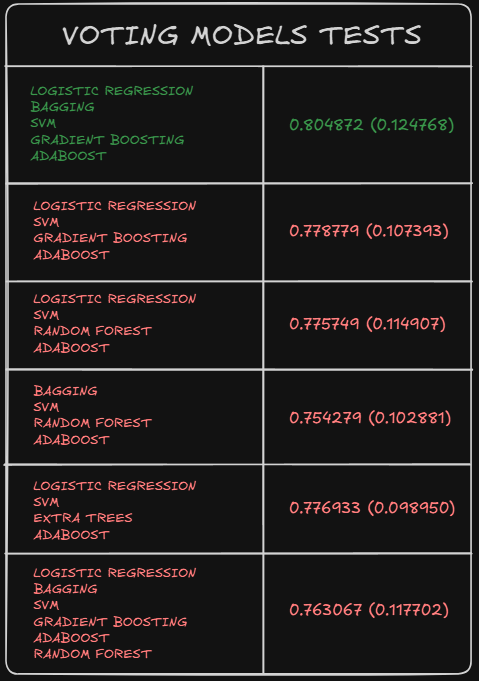

In [314]:
# Cross Validation of all models (WARNING: LONG PROCESSING TIME)

results =[]
names = []

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.770488 (0.121685)
KNN: 0.648198 (0.128480)
CART: 0.719098 (0.098469)
NB: 0.697936 (0.106140)
SVM: 0.753335 (0.136449)
Bag: 0.765161 (0.089843)
RF: 0.735713 (0.134908)
ET: 0.720298 (0.119207)
Ada: 0.734063 (0.106350)
GB: 0.745951 (0.085914)
Voting: 0.804872 (0.124768)


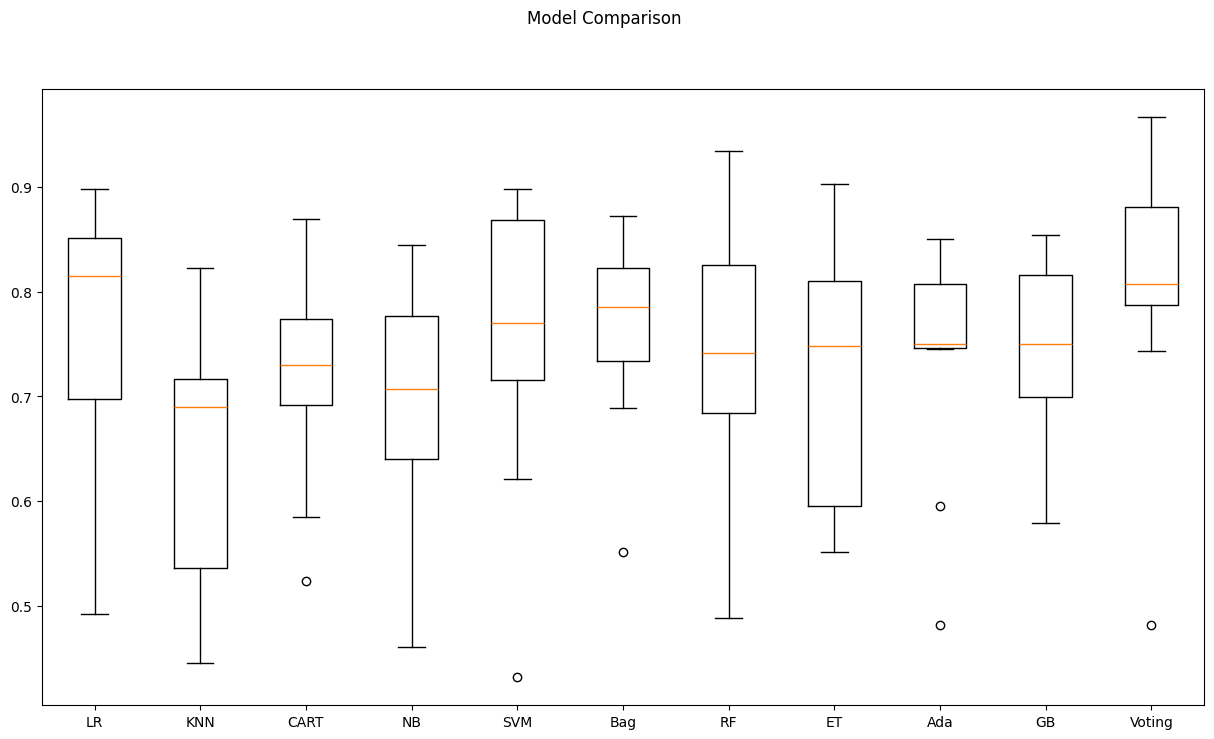

In [315]:
# Boxplot

fig = plt.figure(figsize=(15,8))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Pipeline

In [316]:
pipelines = []

# Logistic Regression
pipelines.append(('LR-Orig', Pipeline([reg_log])))
pipelines.append(('LR-Standard', Pipeline([standard_scaler, reg_log])))
pipelines.append(('LR-Normalization', Pipeline([min_max_scaler, reg_log])))

# KNeighbors Classifier

pipelines.append(('KNN-Orig', Pipeline([knn])))
pipelines.append(('KNN-Standard', Pipeline([standard_scaler, knn])))
pipelines.append(('KNN-Normalization', Pipeline([min_max_scaler, knn])))

# Decision Tree Classifier

pipelines.append(('CART-Orig', Pipeline([cart])))
pipelines.append(('CART-Standard', Pipeline([standard_scaler, cart])))
pipelines.append(('CART-Normalization', Pipeline([min_max_scaler, cart])))

# Naive Bayes

pipelines.append(('NB-Orig', Pipeline([nb])))
pipelines.append(('NB-Standard', Pipeline([standard_scaler, nb])))
pipelines.append(('NB-Normalization', Pipeline([min_max_scaler, nb])))

# SVM

pipelines.append(('SVM-Orig', Pipeline([svm])))
pipelines.append(('SVM-Standard', Pipeline([standard_scaler, svm])))
pipelines.append(('SVM-Normalization', Pipeline([min_max_scaler, svm])))

# Bagging

pipelines.append(('Bag-Orig', Pipeline([bagging])))
pipelines.append(('Bag-Standard', Pipeline([standard_scaler, bagging])))
pipelines.append(('Bag-Normalization', Pipeline([min_max_scaler, bagging])))

# Random Forest

pipelines.append(('RF-Orig', Pipeline([random_forest])))
pipelines.append(('RF-Standard', Pipeline([standard_scaler, random_forest])))
pipelines.append(('RF-Normalization', Pipeline([min_max_scaler, random_forest])))

# Extra Trees

pipelines.append(('ET', Pipeline([extra_trees])))
pipelines.append(('ET-Standard', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('ET-Normalization', Pipeline([min_max_scaler, extra_trees])))

# AdaBoost

pipelines.append(('Ada-Orig', Pipeline([adaboost])))
pipelines.append(('Ada-Standard', Pipeline([standard_scaler, adaboost])))
pipelines.append(('Ada-Normalization', Pipeline([min_max_scaler, adaboost])))

# Gradient Boosting

pipelines.append(('GB-Orig', Pipeline([gradient_boosting])))
pipelines.append(('GB-Standard', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('GB-Normalization', Pipeline([min_max_scaler, gradient_boosting])))

# Voting

pipelines.append (('Vot-Orig', Pipeline([voting])))
pipelines.append(('Vot-Standard', Pipeline([standard_scaler, voting])))
pipelines.append(('Vot-Normalization', Pipeline([min_max_scaler, voting])))

In [317]:
for name, model in pipelines:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR-Orig: 0.770 (0.122)
LR-Standard: 0.744 (0.131)
LR-Normalization: 0.731 (0.120)
KNN-Orig: 0.648 (0.128)
KNN-Standard: 0.680 (0.144)
KNN-Normalization: 0.708 (0.124)
CART-Orig: 0.672 (0.090)
CART-Standard: 0.713 (0.136)
CART-Normalization: 0.652 (0.129)
NB-Orig: 0.698 (0.106)
NB-Standard: 0.691 (0.114)
NB-Normalization: 0.691 (0.114)
SVM-Orig: 0.753 (0.136)
SVM-Standard: 0.721 (0.133)
SVM-Normalization: 0.529 (0.097)
Bag-Orig: 0.765 (0.090)
Bag-Standard: 0.762 (0.087)
Bag-Normalization: 0.762 (0.087)
RF-Orig: 0.744 (0.100)
RF-Standard: 0.729 (0.092)
RF-Normalization: 0.709 (0.115)
ET: 0.741 (0.116)
ET-Standard: 0.702 (0.121)
ET-Normalization: 0.729 (0.125)
Ada-Orig: 0.734 (0.106)
Ada-Standard: 0.734 (0.106)
Ada-Normalization: 0.742 (0.110)
GB-Orig: 0.746 (0.086)
GB-Standard: 0.743 (0.085)
GB-Normalization: 0.746 (0.086)
Vot-Orig: 0.805 (0.125)
Vot-Standard: 0.779 (0.089)
Vot-Normalization: 0.762 (0.080)


The top-performing models, based on the mean F1 score and standard deviation, are Vot-Orig, Vot-Standard, and Vot-Normalization. Additionally, Bag-Orig and GB-Orig demonstrated strong performance.

- Vot-Orig (Voting Classifier - original): Achieved the highest F1 score of 0.805 with a standard deviation of 0.125, making it the best-performing model overall.

- Vot-Standard (Voting Classifier - standardized): Delivered a strong F1 score of 0.779 with a standard deviation of 0.089, combining high performance with exceptional consistency.

- Vot-Normalization (Voting Classifier - normalized): Recorded an F1 score of 0.762 with the lowest standard deviation of 0.080, highlighting its remarkable stability and reliability.

- Bag-Orig (Bagging Classifier - original): Achieved a notable F1 score of 0.765 with a standard deviation of 0.090, offering a solid balance between performance and consistency.

- GB-Orig (Gradient Boosting - original): Delivered an F1 score of 0.746 with a low standard deviation of 0.086, showcasing reliable and stable predictive capabilities.

These models stand out due to their high F1 scores and relatively low standard deviations, indicating strong predictive power and consistency. Vot-Orig, in particular, remains the top choice for this classification task due to its superior overall performance.

# Machine Learning

In [318]:
best_model = (VotingClassifier(estimators=votingBase))
best_model.fit(X_train, y_train)

VotingClassifier(estimators=[('LR',
                              LogisticRegression(class_weight='balanced',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('Bag',
                              BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                max_features=0.8,
                                                max_samples=0.8,
                                                n_estimators=1000,
                                                random_state=28)),
                             ('SVM', SVC(C=0.1, kernel='linear')),
                             ('GB',
                              GradientBoostingClassifier(max_depth=10,
                                                         min_samples_leaf=2,
                                                         min_samples_split=10,
                                                         n_estimators=50,
                                                         random_state=28)),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=1.5,
                                                 random_state=28))])

In [319]:
y_pred = best_model.predict(X_test)

In [320]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.917
Classification Report:
               precision    recall  f1-score   support

    Low Tier       0.80      1.00      0.89        20
    Mid Tier       1.00      0.87      0.93        38
    Top Tier       1.00      1.00      1.00         2

    accuracy                           0.92        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.93      0.92      0.92        60

Confusion Matrix:
 [[20  0  0]
 [ 5 33  0]
 [ 0  0  2]]


Based on the results obtained from the Voting Classifier model, the model performs exceptionally well in classifying players into different tiers. The Test Accuracy achieved was 0.917, indicating that the model correctly predicted the tier for approximately 92% of the players in the test set.

The Classification Report demonstrates strong performance across all tiers. For the Low Tier, the model achieved an F1-score of 0.89, with perfect recall (1.00) and slightly lower precision (0.80), showing it is highly sensitive in identifying Low Tier players while occasionally misclassifying others as low tier. The Mid Tier performed the best overall, with an F1-score of 0.93, precision of 1.00, and recall of 0.87, highlighting a great balance between precision and recall. For the Top Tier, the model achieved a perfect F1-score of 1.00, with both precision and recall at 1.00, indicating that it flawlessly identified Top Tier players. However, this result might be influenced by the small sample size for this class (only 2 players).

The Confusion Matrix confirms this performance. All Low Tier players were correctly classified, most Mid Tier players were correctly identified with only 5 misclassified as Low Tier, and both Top Tier players were correctly classified, highlighting the model's ability to recognize this group in the test set.

In conclusion, the Voting Classifier model demonstrates excellent performance overall, achieving high F1-scores and balanced metrics across all tiers. Further evaluation on a larger dataset, especially for Top Tier players, would help validate these results.




---



# Testing the Model in Premier League Season 22/23

In [321]:
url_scorestable_22_23 = 'https://raw.githubusercontent.com/jpedrocf/MachineLearningMVP/refs/heads/main/player-score-22-23.csv'
url_playerstable_22_23 ='https://raw.githubusercontent.com/jpedrocf/MachineLearningMVP/refs/heads/main/premier-player-22-23.csv'

In [322]:
playerstable_22_23 = pd.read_csv(url_playerstable_22_23, sep=',')
scorestable_22_23 = pd.read_csv(url_scorestable_22_23, sep=',')

In [323]:
playerstable_22_23.head()

,Unnamed: 0,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
0,0,Aaron Ramsdale,ENG,GK,24.0,38,38,3420.0,38.0,0.0,...,1,100.0,0,0,0,0,0,1,20,6
1,1,Gabriel Dos Santos,BRA,DF,24.0,38,38,3409.0,37.9,3.0,...,27,66.7,9,49,26,23,32,80,125,2
2,2,Bukayo Saka,ENG,FW,20.0,38,37,3181.0,35.3,14.0,...,44,45.5,24,38,0,38,14,77,19,0
3,3,Martin Ødegaard,NOR,MF,23.0,37,37,3127.0,34.7,15.0,...,47,29.8,33,20,5,15,6,42,12,1
4,4,Ben White,ENG,DF,24.0,38,36,3055.0,33.9,2.0,...,70,60.0,28,47,11,36,22,82,79,1


In [324]:
scorestable_22_23.head()

,Rank,Player,Rating
0,1,Asmir Begovi?,8.00
1,2,Stefan Ortega,7.87
2,3,Kevin De Bruyne,7.78
3,4,Kieran Trippier,7.61
4,5,Bruno Fernandes,7.56


In [325]:
players_df22_merged = playerstable_22_23.merge(scorestable_22_23[["Player", "Rating"]], on='Player', how = 'left')
players_df22_merged.head()

,Unnamed: 0,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Rating
0,0,Aaron Ramsdale,ENG,GK,24.0,38,38,3420.0,38.0,0.0,...,100.0,0,0,0,0,0,1,20,6,6.86
1,1,Gabriel Dos Santos,BRA,DF,24.0,38,38,3409.0,37.9,3.0,...,66.7,9,49,26,23,32,80,125,2,NaN
2,2,Bukayo Saka,ENG,FW,20.0,38,37,3181.0,35.3,14.0,...,45.5,24,38,0,38,14,77,19,0,7.31
3,3,Martin Ødegaard,NOR,MF,23.0,37,37,3127.0,34.7,15.0,...,29.8,33,20,5,15,6,42,12,1,7.35
4,4,Ben White,ENG,DF,24.0,38,36,3055.0,33.9,2.0,...,60.0,28,47,11,36,22,82,79,1,6.90


In [326]:
players_df22 = players_df22_merged[['Player', 'Nation', 'Pos', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR', 'xG', 'xAG', 'Rating']]

In [327]:
players_df22 = players_df22[~players_df22['Pos'].isin(['GK', 'DF', 'DF,FW', 'DF,MF', 'FW,DF', 'MF,DF'])]
players_df22['Pos'] = players_df22['Pos'].replace({'MF,FW': 'MF', 'FW,MF': 'FW'})
players_df22['Pos'].value_counts()

,count
Pos,
MF,151
FW,135


In [328]:
players_df22['Gls+Ast'] = players_df22['Gls'] + players_df22['Ast']
players_df22['xAst+xG'] = players_df22['xAG'] + players_df22['xG']

In [329]:
duplicate_players22 = players_df22[players_df22.duplicated(subset=['Player'], keep=False)]
print(f"Number of duplicate players: {len(duplicate_players22)}")
duplicate_players22.sort_values(by='Player')

Number of duplicate players: 20


,Player,Nation,Pos,Starts,Min,90s,Gls,Ast,CrdY,CrdR,PrgC,PrgP,PrgR,xG,xAG,Rating,Gls+Ast,xAst+xG
19,Albert Sambi Lokonga,BEL,MF,2,198.0,2.2,0.0,0.0,0.0,0.0,0.0,12.0,2.0,0.0,0.0,6.72,0.0,0.0
166,Albert Sambi Lokonga,BEL,MF,6,536.0,6.0,0.0,0.0,2.0,0.0,2.0,20.0,2.0,0.2,0.0,6.72,0.0,0.2
187,Anthony Gordon,ENG,FW,12,1095.0,12.2,3.0,0.0,6.0,0.0,28.0,19.0,67.0,3.3,0.6,6.65,3.0,3.9
362,Anthony Gordon,ENG,FW,4,487.0,5.4,1.0,0.0,1.0,0.0,20.0,15.0,45.0,1.7,0.9,6.65,1.0,2.6
363,Chris Wood,NZL,FW,4,446.0,5.0,2.0,0.0,0.0,0.0,1.0,4.0,23.0,1.8,0.3,6.64,2.0,2.1
393,Chris Wood,NZL,FW,5,372.0,4.1,1.0,0.0,0.0,0.0,2.0,7.0,12.0,1.0,0.2,6.64,1.0,1.2
214,Daniel James,WAL,FW,5,621.0,6.9,2.0,1.0,0.0,0.0,24.0,15.0,48.0,1.7,0.7,6.72,3.0,2.4
244,Daniel James,WAL,FW,2,198.0,2.2,0.0,0.0,0.0,0.0,6.0,3.0,9.0,0.3,0.3,6.72,0.0,0.6
38,Danny Ings,ENG,FW,8,824.0,9.2,6.0,0.0,3.0,0.0,15.0,12.0,46.0,5.3,1.2,6.75,6.0,6.5
472,Danny Ings,ENG,FW,7,775.0,8.6,2.0,2.0,1.0,0.0,9.0,12.0,44.0,3.0,1.0,6.75,4.0,4.0


In [330]:
sum_columns = ['Starts', 'Min', '90s', 'Gls', 'Ast', 'CrdY', 'CrdR', 'xG', 'xAG', 'xAst+xG', 'Gls+Ast', 'PrgC', 'PrgP', 'PrgR']
players_df22_summed = players_df22.copy()
players_df22_summed[sum_columns] = players_df22.groupby('Player')[sum_columns].transform('sum')

players_df22 = players_df22_summed

In [331]:
players_df22['PrgCPer90'] = players_df22['PrgC'] / players_df22['90s']
players_df22['PrgPPer90'] = players_df22['PrgP'] / players_df22['90s']
players_df22['PrgRPer90'] = players_df22['PrgR'] / players_df22['90s']

In [332]:
players_df22 = players_df22.dropna(subset=['Rating'])
players_df22  = players_df22.dropna(subset=['PrgRPer90'])

In [333]:
scores = players_df22['Rating'].values.reshape(-1, 1)

kmeans = KMeans(n_clusters=3, random_state=28).fit(scores)

players_df22['Category Cluster'] = kmeans.labels_
category_map = {0: 'Low Tier', 1: 'Mid Tier', 2: 'Top Tier'}
players_df22['Category Cluster'] = players_df22['Category Cluster'].map(category_map)

players_df22['Category Cluster'].value_counts()

,count
Category Cluster,
Mid Tier,109
Low Tier,109
Top Tier,41


In [334]:
players_df22.head()

,Player,Nation,Pos,Starts,Min,90s,Gls,Ast,CrdY,CrdR,...,PrgR,xG,xAG,Rating,Gls+Ast,xAst+xG,PrgCPer90,PrgPPer90,PrgRPer90,Category Cluster
2,Bukayo Saka,ENG,FW,37,3181.0,35.3,14.0,11.0,6.0,0.0,...,520.0,11.2,8.5,7.31,25.0,19.7,5.070822,3.087819,14.730878,Top Tier
3,Martin Ødegaard,NOR,MF,37,3127.0,34.7,15.0,7.0,4.0,0.0,...,193.0,10.0,8.1,7.35,22.0,18.1,2.391931,7.665706,5.561960,Top Tier
5,Granit Xhaka,SUI,MF,36,2993.0,33.3,7.0,7.0,4.0,0.0,...,175.0,4.7,5.2,7.04,14.0,9.9,1.261261,5.885886,5.255255,Top Tier
7,Thomas Partey,GHA,MF,28,2483.0,27.6,3.0,0.0,5.0,0.0,...,35.0,2.2,1.5,7.11,3.0,3.7,1.231884,8.369565,1.268116,Top Tier
10,Gabriel Jesus,BRA,FW,24,2064.0,22.9,11.0,6.0,6.0,0.0,...,194.0,14.0,3.9,7.07,17.0,17.9,1.921397,2.794760,8.471616,Top Tier


In [335]:
players_df_final_encoded22 = pd.get_dummies(players_df22, columns=['Pos'])

print(players_df_final_encoded22.head())

             Player Nation  Starts     Min   90s   Gls   Ast  CrdY  CrdR  \
2       Bukayo Saka    ENG      37  3181.0  35.3  14.0  11.0   6.0   0.0   
3   Martin Ødegaard    NOR      37  3127.0  34.7  15.0   7.0   4.0   0.0   
5      Granit Xhaka    SUI      36  2993.0  33.3   7.0   7.0   4.0   0.0   
7     Thomas Partey    GHA      28  2483.0  27.6   3.0   0.0   5.0   0.0   
10    Gabriel Jesus    BRA      24  2064.0  22.9  11.0   6.0   6.0   0.0   

     PrgC  ...  xAG  Rating  Gls+Ast  xAst+xG  PrgCPer90  PrgPPer90  \
2   179.0  ...  8.5    7.31     25.0     19.7   5.070822   3.087819   
3    83.0  ...  8.1    7.35     22.0     18.1   2.391931   7.665706   
5    42.0  ...  5.2    7.04     14.0      9.9   1.261261   5.885886   
7    34.0  ...  1.5    7.11      3.0      3.7   1.231884   8.369565   
10   44.0  ...  3.9    7.07     17.0     17.9   1.921397   2.794760   

    PrgRPer90  Category Cluster  Pos_FW  Pos_MF  
2   14.730878          Top Tier    True   False  
3    5.561960   

In [336]:
features_22 = players_df_final_encoded22.drop(columns=['Player', 'Nation', 'Rating', 'Category Cluster', 'CrdY', 'CrdR', 'xG', 'PrgRPer90', 'PrgPPer90', 'PrgCPer90'])

In [337]:
features_22.columns

Index(['Starts', 'Min', '90s', 'Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR', 'xAG',
       'Gls+Ast', 'xAst+xG', 'Pos_FW', 'Pos_MF'],
      dtype='object')

In [338]:
features_player.columns

Index(['Starts', 'Min', '90s', 'Gls', 'Ast', 'PrgC', 'PrgP', 'PrgR', 'xAG',
       'Gls+Ast', 'xAst+xG', 'Pos_FW', 'Pos_MF'],
      dtype='object')

2 features are equal and good to go

In [339]:
X = features_22
y = players_df22['Category Cluster']

In [340]:
y_pred = best_model.predict(X)

In [341]:
test_accuracy = accuracy_score(y, y_pred)
print(f"Test Accuracy: {test_accuracy:.3f}")

print("Classification Report:\n", classification_report(y, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y, y_pred))

Test Accuracy: 0.703
Classification Report:
               precision    recall  f1-score   support

    Low Tier       0.72      0.92      0.81       109
    Mid Tier       0.65      0.66      0.65       109
    Top Tier       1.00      0.24      0.39        41

    accuracy                           0.70       259
   macro avg       0.79      0.61      0.62       259
weighted avg       0.74      0.70      0.68       259

Confusion Matrix:
 [[100   9   0]
 [ 37  72   0]
 [  1  30  10]]


**Analyzing the Model's Performance on the New Dataset (Season 22/23)**
---
In this iteration, I tested my previously trained ensemble model on a new dataset containing data from the 22/23 football season. The main objective was to assess the model's ability to generalize and predict outcomes based on features derived from this earlier season.

**Results Overview**
---
The model achieved a test accuracy of 70.3%, indicating that it correctly classified 7 out of 10 instances on average. Below are the key insights from the classification report and confusion matrix:

___
**Class-Specific Performance:**
---
For the "Low Tier" class:
---
- Precision: 0.72

- Recall: 0.92

- F1-Score: 0.81


For the "Mid Tier" class:
---
- Precision: 0.65

- Recall: 0.66

- F1-Score: 0.65

For the "Top Tier" class:
---
- Precision: 1.00

- Recall: 0.24

- F1-Score: 0.39

___


Confusion Matrix Observations:
---
Most misclassifications occurred between the "Mid Tier" and "Top Tier" classes, reflecting possible overlaps in their features.
The "Low Tier" class was the easiest for the model to predict, with only a small number of misclassifications.


Analysis
---

The results highlight that the model has good predictive power but struggles with class imbalance, especially for the "Top Tier" class. During the model's training and testing on the original dataset, there were only two instances of the "Top Tier" class, which likely caused the model to underfit this category. Consequently, the model appears overly cautious about predicting "Top Tier" instances when applied to the 22/23 dataset. However, the perfect precision (1.00) suggests that, when the model does predict "Top Tier," it is confident and correct. This reinforces the need to address class imbalance to improve the recall (0.24) for this underrepresented category.

Conclusion
---
Testing the model with data from the 22/23 season demonstrated its potential to generalize well across different datasets. However, the results also highlight areas for improvement, particularly in handling class imbalance and improving recall for "Top Tier" teams. With these findings, I aim to further refine the model and enhance its predictive capabilities.

---
I would like to thank the support and guidance from the PUC-Rio professors during this sprint. I am very grateful! I hope you enjoyed the MVP and I will continue studying to improve myself. Thank you!!